# **Загрузка_данных_с_моего_компьютера**

**1. Скачиваем zip-архив в колаб**

**2. Разархивируем картинки с помощью !unzip**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/DOM')

In [ ]:
!unzip "/content/gdrive/MyDrive/Colab Notebooks/DOM/animals.zip"

__________________________________________

In [ ]:
!pip3 install opencv-python

In [ ]:
!pip3 install glob2

In [ ]:
import glob
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
import torchvision
from torchvision import transforms
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import pandas as pd

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/DOM')

In [ ]:
train_data_path = '/content/gdrive/MyDrive/Colab Notebooks/DOM/animals/train'

In [ ]:
transforms = transforms.Compose([
              transforms.Resize(64),
              transforms.ToTensor(),
              transforms.Normalize(mean=[0.485, 0.456, 0.406],
              std=[0.229, 0.224, 0.225] )
              ])

In [ ]:
train_data = torchvision.datasets.ImageFolder(root=train_data_path,transform=transforms)

In [ ]:
lst=[]

In [ ]:
for i,j in train_data:
  lst.append([i[0],j])

In [ ]:
train_data[0]

In [ ]:
train_data[305][0].shape

torch.Size([3, 64, 64])

In [ ]:
len(train_data)

340

In [ ]:
train_data[20][0][0]

tensor([[-0.8507, -0.8164, -0.7650,  ..., -1.5528, -1.5185, -1.4329],
        [-0.9363, -0.9534, -0.9363,  ..., -1.4329, -1.4158, -1.4158],
        [-1.0904, -1.0733, -1.0562,  ..., -1.2445, -1.2788, -1.1932],
        ...,
        [-0.8164, -0.8164, -0.7479,  ..., -0.3883, -0.3369, -0.4397],
        [-0.6794, -0.7308, -0.6281,  ..., -0.3712, -0.5253, -0.6452],
        [-0.6281, -0.6623, -0.5424,  ..., -0.4568, -0.6109, -0.6623]])

<function matplotlib.pyplot.show(*args, **kw)>

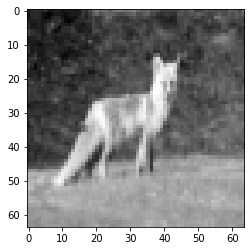

In [ ]:
plt.imshow(train_data[0][0][0], cmap="gray")
plt.show

__________________________________________________

In [ ]:
val_data_path = "/content/gdrive/MyDrive/Colab Notebooks/DOM/animals/val"

In [ ]:
val_data = torchvision.datasets.ImageFolder(root=val_data_path,
                                            transform=transforms)

In [ ]:
lst_val=[]

In [ ]:
for i,j in val_data:
  lst_val.append([i[0],j])

_____________________________________________

In [ ]:
test_data_path = "/content/gdrive/MyDrive/Colab Notebooks/DOM/animals/test"

In [ ]:
test_data = torchvision.datasets.ImageFolder(root=test_data_path,
                                            transform=transforms)

In [ ]:
lst_test=[]

In [ ]:
for i,j in test_data:
  lst_test.append([i[0],j])

**!!!!!Добавление измерения:**

In [ ]:
lst_test[0][0].unsqueeze(0).shape

In [ ]:
lst_test[0][0].view(-1, 5440).shape

torch.Size([1, 5440])

_________________________________________________

**lst**

**lst_val**

**lst_test**

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print (f"Using {device} device")

Using cuda device


In [ ]:
if torch.cuda.is_available():
 device = torch.device("cuda")
else:
 device = torch.device("cpu")
simplenet.to(device)

SimpleNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=12288, out_features=84, bias=True)
    (1): Linear(in_features=84, out_features=50, bias=True)
    (2): Linear(in_features=50, out_features=2, bias=True)
  )
)

In [ ]:
batch_size=30
train_data_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_data_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [ ]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(
        nn.Linear(12288, 84),
        nn.Linear(84, 50),
        nn.Linear(50,2),)
    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
simplenet = SimpleNet()

In [ ]:
import torch.optim as optim
optimizer = optim.Adam(simplenet.parameters(), lr=0.001)

In [ ]:
loss_fn=torch.nn.CrossEntropyLoss()

In [ ]:
def train(model, optimizer, loss_fn, train_loader, val_loader,
epochs=20, device="cpu"):
    for epoch in range(20):
      training_loss = 0.0
      valid_loss = 0.0
      model.train()
      for batch in train_loader:
        optimizer.zero_grad()
        inputs, target = batch
        inputs = inputs.to(device)
        target = target.to(device)
        output = model(inputs)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        training_loss += loss.data.item()
      training_loss /= len(train_loader)
      model.eval()
      num_correct = 0
      num_examples = 0
      for batch in val_loader:
          inputs, targets = batch
          inputs = inputs.to(device)
          output = model(inputs)
          targets = targets.to(device)
          loss = loss_fn(output,targets)
          valid_loss += loss.data.item()
          correct = torch.eq(torch.max(F.softmax(output), dim=1)[1],
          targets).view(-1)
          num_correct += torch.sum(correct).item()
          num_examples += correct.shape[0]
      valid_loss /= len(val_loader)
      print('Epoch: {}, Training Loss: {:.2f},Validation Loss: {:.2f},accuracy = {:.2f}'.format
          (epoch, training_loss,valid_loss, num_correct / num_examples))


In [ ]:
train(simplenet, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader,device)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 0, Training Loss: 0.01,Validation Loss: 1.54,accuracy = 0.71
Epoch: 1, Training Loss: 0.01,Validation Loss: 1.58,accuracy = 0.71
Epoch: 2, Training Loss: 0.00,Validation Loss: 1.56,accuracy = 0.72
Epoch: 3, Training Loss: 0.00,Validation Loss: 1.56,accuracy = 0.72
Epoch: 4, Training Loss: 0.00,Validation Loss: 1.61,accuracy = 0.70
Epoch: 5, Training Loss: 0.00,Validation Loss: 1.64,accuracy = 0.68
Epoch: 6, Training Loss: 0.00,Validation Loss: 1.64,accuracy = 0.71
Epoch: 7, Training Loss: 0.00,Validation Loss: 1.65,accuracy = 0.72
Epoch: 8, Training Loss: 0.00,Validation Loss: 1.68,accuracy = 0.71
Epoch: 9, Training Loss: 0.00,Validation Loss: 1.71,accuracy = 0.71
Epoch: 10, Training Loss: 0.00,Validation Loss: 1.71,accuracy = 0.72
Epoch: 11, Training Loss: 0.00,Validation Loss: 1.71,accuracy = 0.72
Epoch: 12, Training Loss: 0.00,Validation Loss: 1.73,accuracy = 0.71
Epoch: 13, Training Loss: 0.00,Validation Loss: 1.74,accuracy = 0.72
Epoch: 14, Training Loss: 0.00,Validation Lo

________________________________________

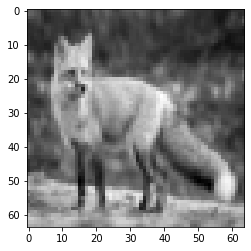

In [ ]:
plt.imshow(test_data[0][0][0], cmap="gray")

In [ ]:
from PIL import Image

tensor([[[1.2557, 1.1187, 0.6563,  ..., 1.7694, 1.7694, 1.7694],
         [1.6838, 1.2557, 0.8447,  ..., 1.7523, 1.7694, 1.7865],
         [1.7352, 0.8618, 0.8618,  ..., 1.7694, 1.7865, 1.7865],
         ...,
         [1.5468, 1.5125, 1.5297,  ..., 1.6495, 1.6838, 1.8379],
         [1.5297, 1.5297, 1.4954,  ..., 1.6324, 1.6495, 1.6838],
         [1.5125, 1.5125, 1.4783,  ..., 1.6153, 1.6495, 1.6495]],

        [[1.3782, 1.2556, 0.7304,  ..., 1.8859, 1.8859, 1.8859],
         [1.8158, 1.3782, 0.9230,  ..., 1.8683, 1.8859, 1.9034],
         [1.8683, 0.9580, 0.9055,  ..., 1.8859, 1.9034, 1.9034],
         ...,
         [1.6583, 1.6232, 1.6408,  ..., 1.6583, 1.6583, 1.8333],
         [1.6583, 1.6583, 1.6232,  ..., 1.6758, 1.6583, 1.6583],
         [1.6408, 1.6408, 1.6057,  ..., 1.6758, 1.6758, 1.6232]],

        [[1.7685, 1.6640, 1.1062,  ..., 2.4308, 2.4308, 2.4308],
         [2.2566, 1.8208, 1.3154,  ..., 2.4134, 2.4308, 2.4483],
         [2.3088, 1.3677, 1.3328,  ..., 2.4134, 2.4483, 2.

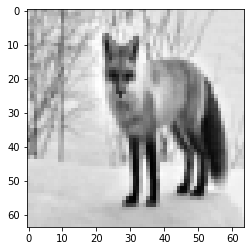

In [ ]:
labels = ['fox','lion']
img = Image.open('/content/gdrive/MyDrive/Colab Notebooks/DOM/animals/train/fox/00000011_224resized.png')
img = transforms(img)
print(img)
plt.imshow(img[0], cmap="gray")
img = img.unsqueeze(0)
prediction = simplenet(img)
prediction = prediction.argmax()
print(labels[prediction])

In [ ]:
train_data[1][0].view(-1, 12288)

tensor([[-1.6213, -1.6213, -1.6213,  ...,  2.6051,  2.6051,  2.6051]])

In [ ]:
lst_test[0][0].view(-1, 5440).shape

**предсказываем:**

In [ ]:
for i in range(len(test_data)):
  prediction = simplenet(test_data[i][0].view(-1, 12288))
  prediction = prediction.argmax()
  print(labels[prediction])
  plt.imshow(test_data[i][0][0], cmap="gray")

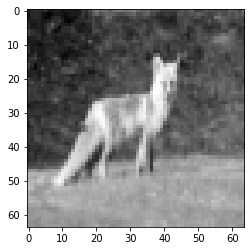

In [ ]:
plt.imshow(train_data[0][0][0], cmap="gray")

In [ ]:
train_features, train_labels = next(iter(train_data_loader))

In [ ]:
train_features.size()

torch.Size([14, 3, 64, 64])

# **Сохранение/загрузка модели**

**Сохранение содели**

In [ ]:
torch.save(simplenet, "/content/gdrive/MyDrive/Colab Notebooks/DOM/animals/simplenet")

**Сохранение модели в форме словаря**

In [ ]:
torch.save(simplenet.state_dict(), '/content/gdrive/MyDrive/Colab Notebooks/DOM/animals/12')

**Загрузка модели**

In [ ]:
simplenet = SimpleNet()
simplenet_state_dict = torch.load("/content/gdrive/MyDrive/Colab Notebooks/DOM/animals/simplenet")
simplenet.load_state_dict('/content/gdrive/MyDrive/Colab Notebooks/DOM/animals/12')